Kích thước ảnh: (309, 515)


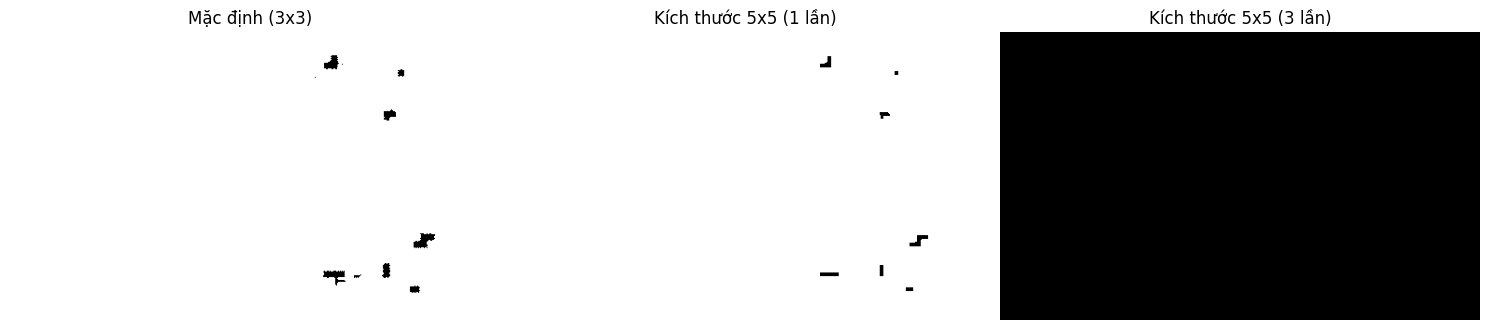

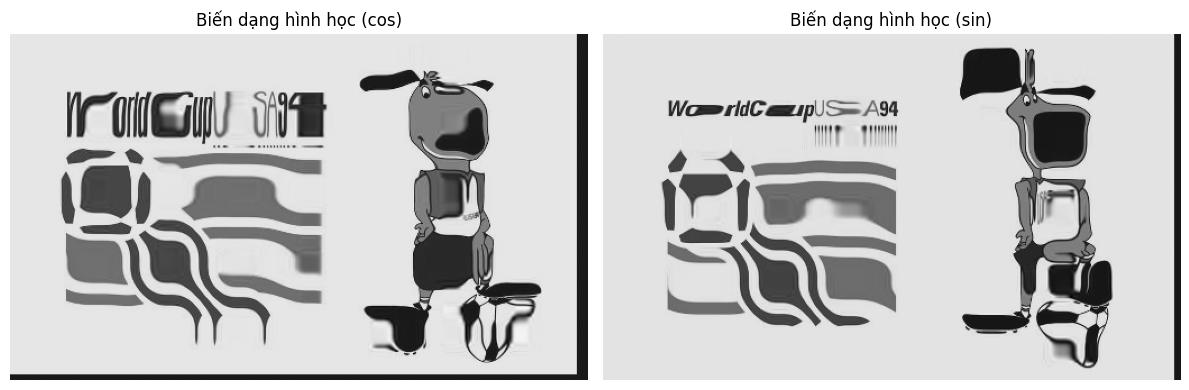

In [1]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Đọc ảnh grayscale dạng float
data = iio.imread('world_cup.jpg', mode='F')
print("Kích thước ảnh:", data.shape)

# Chuyển ảnh thành nhị phân (ngưỡng 0.5)
binary_data = data > 0.5

# Tạo structuring element (hạt nhân) kích thước 5x5
structure = np.ones((5, 5))

# Giãn nhị phân mặc định (kernel 3x3 ngầm định)
d1 = nd.binary_dilation(binary_data)

# Giãn nhị phân với kernel 5x5 và lặp lại 1 lần
d2 = nd.binary_dilation(binary_data, structure=structure)

# Giãn nhị phân với kernel 5x5 và lặp lại 3 lần
d3 = nd.binary_dilation(binary_data, structure=structure, iterations=3)

# Hiển thị so sánh
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(d1, cmap='gray')
plt.title("Mặc định (3x3)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(d2, cmap='gray')
plt.title("Kích thước 5x5 (1 lần)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(d3, cmap='gray')
plt.title("Kích thước 5x5 (3 lần)")
plt.axis('off')

plt.tight_layout()
plt.show()

# | Thuộc tính       | `structure` mặc định (3x3) | `structure=(5, 5)` 1 lần | `structure=(5, 5)` 3 lần      |
# | ---------------- | -------------------------- | ------------------------ | ----------------------------- |
# | **Độ giãn nở**   | Nhẹ                        | Rộng hơn rõ rệt          | Rất mạnh                      |
# | **Chi tiết nhỏ** | Còn giữ được               | Một phần mất             | Nhiều chi tiết bị mất         |
# | **Biên ảnh**     | Giãn nhẹ                   | Mở rộng rộng hơn         | Mở rộng mạnh, gần như che lấp |
# Kết luận: Khi structure càng lớn và số lần lặp càng cao, hình ảnh càng bị giãn mạnh, làm mất chi tiết nhỏ và mờ đi hình dạng ban đầu.


import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Đọc ảnh grayscale
data = iio.imread('world_cup.jpg', mode='F')

# Hàm biến đổi dùng cos
def GeoCos(outcoord):
    a = 10 * np.cos(outcoord[0] / 10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1] / 10.0) + outcoord[1]
    return a, b

# Hàm biến đổi dùng sin
def GeoSin(outcoord):
    a = 10 * np.sin(outcoord[0] / 10.0) + outcoord[0]
    b = 10 * np.sin(outcoord[1] / 10.0) + outcoord[1]
    return a, b

# Áp dụng biến đổi
trans_cos = nd.geometric_transform(data, GeoCos)
trans_sin = nd.geometric_transform(data, GeoSin)

# Hiển thị cả 2 ảnh
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(trans_cos, cmap='gray')
plt.title("Biến dạng hình học (cos)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(trans_sin, cmap='gray')
plt.title("Biến dạng hình học (sin)")
plt.axis('off')

plt.tight_layout()
plt.show()

# | Hàm   | Kết quả                                                                                                  |
# | ----- | -------------------------------------------------------------------------------------------------------- |
# | `cos` | Biến dạng theo dạng sóng **gợn sóng ngang** mượt hơn                                                     |
# | `sin` | Biến dạng tương tự nhưng **độ cong và hướng lượn sóng khác** (do tính chất lệch pha 90° giữa sin và cos) |




